In [1]:
from google.colab import files
uploaded = files.upload()

Saving sun_and_cloud.csv to sun_and_cloud.csv


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('sun_and_cloud.csv',encoding = 'cp949')

print(data.info())
print('--------------------------------------------','\n')
print(data.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간           26304 non-null  int64  
 1   일조(hr)       26304 non-null  float64
 2   일사(MJ/m2)    26304 non-null  float64
 3   전운량(10분위)    26304 non-null  float64
 4   중하층운량(10분위)  26304 non-null  float64
 5   지면온도(°C)     26304 non-null  float64
 6   시정(10m)      26304 non-null  int64  
 7   전력거래량        26304 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.6 MB
None
-------------------------------------------- 

시간               23.000000
일조(hr)            1.000000
일사(MJ/m2)         3.780000
전운량(10분위)        10.000000
중하층운량(10분위)      10.000000
지면온도(°C)         62.400000
시정(10m)        5000.000000
전력거래량            10.807822
dtype: float64


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
result = scaler.fit_transform(data)
df_scld= pd.DataFrame(data=result,columns=data.columns)
df_scld

,시간,일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),지면온도(°C),시정(10m),전력거래량
0,0.000000,0.0,0.0,0.0,0.0,0.150000,0.268234,0.000000
1,0.043478,0.0,0.0,0.0,0.0,0.143421,0.397227,0.000000
2,0.086957,0.0,0.0,0.0,0.0,0.139474,0.397227,0.000000
3,0.130435,0.0,0.0,0.0,0.0,0.132895,0.397227,0.000000
4,0.173913,0.0,0.0,0.0,0.0,0.128947,0.396022,0.000000
...,...,...,...,...,...,...,...,...
26299,0.826087,0.0,0.0,0.0,0.0,0.122368,0.397227,0.005463
26300,0.869565,0.0,0.0,0.0,0.0,0.110526,0.397227,0.005455
26301,0.913043,0.0,0.0,0.0,0.0,0.103947,0.397227,0.000866
26302,0.956522,0.0,0.0,0.0,0.0,0.098684,0.397227,0.000000


In [4]:
x_train = df_scld.iloc[:25560,:-1] # 18년 ~ 20년 11월 --> Train & Validation
y_train = df_scld.iloc[:25560,-1] # 18년 ~ 20년 11월 --> Train & Validation

x_pred = df_scld.iloc[25560:,:-1] # 20년 12월- 예측용 변수 --> Preidction
y_pred = df_scld.iloc[25560:,-1] # 20년 12월 - 예측용 정답 --> Preidction


# --- Ensemble 을 위해서 np.array 형태로 data type 전환해보기
x_train = np.array(x_train)
y_train = np.array(y_train)

x_pred = np.array(x_pred)
y_pred = np.array(y_pred)

print(x_train,'\n',x_pred,'\n',y_train,'\n',y_pred)
print('------------------------------------------------------------------------------------------------------------------------')
print(x_train.shape,'\n',x_pred.shape,'\n',y_train.shape,'\n',y_pred.shape)

[[0.         0.         0.         ... 0.         0.15       0.26823388]
 [0.04347826 0.         0.         ... 0.         0.14342105 0.39722725]
 [0.08695652 0.         0.         ... 0.         0.13947368 0.39722725]
 ...
 [0.91304348 0.         0.         ... 0.         0.16973684 0.39722725]
 [0.95652174 0.         0.         ... 0.         0.16052632 0.39722725]
 [1.         0.         0.         ... 0.         0.15657895 0.39722725]] 
 [[0.         0.         0.         ... 0.         0.15526316 0.39722725]
 [0.04347826 0.         0.         ... 0.         0.15394737 0.39722725]
 [0.08695652 0.         0.         ... 0.         0.15131579 0.39722725]
 ...
 [0.91304348 0.         0.         ... 0.         0.10394737 0.39722725]
 [0.95652174 0.         0.         ... 0.         0.09868421 0.39722725]
 [1.         0.         0.         ... 0.         0.09342105 0.39722725]] 
 [0.         0.         0.         ... 0.00438201 0.         0.        ] 
 [0.00000000e+00 0.00000000e+00 0.0

In [5]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)
x_pred = x_pred.reshape(x_pred.shape[0],x_pred.shape[1],1)

#print(x_train.shape,'\n',x_val.shape,'\n',x_pred.shape)
print(x_train.shape,'\n',x_pred.shape)

feature_num = len(x_train[0])
feature_num

(25560, 7, 1) 
 (744, 7, 1)


7

In [14]:
Epochs = 100 #---------------------------------------------------------------[ 100 / 150 / 200 / 250 ] 총 4차례 진행

from tensorflow.keras import models, layers

LSTM= models.Sequential()
LSTM.add(layers.LSTM(units=32, return_sequences=True,  activation='tanh', input_shape=(feature_num,1)))
LSTM.add(layers.Dropout(rate=0.2))
LSTM.add(layers.LSTM(units=64, return_sequences=True, activation='tanh'))
LSTM.add(layers.Dropout(rate=0.2))
LSTM.add(layers.LSTM(64, activation='tanh')) 
LSTM.add(layers.Dropout(rate=0.2))
LSTM.add(layers.Dense(1)) 

LSTM.summary()

LSTM.compile(loss='mse', optimizer='adam', metrics=['mae']) 

history = LSTM.fit(x_train, y_train, validation_split=0.2, epochs=150) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4352      
                                                                 
 dropout_3 (Dropout)         (None, 7, 32)             0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 64)             24832     
                                                                 
 dropout_4 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [15]:
predict = LSTM.predict(x_pred)

In [16]:
max_val = data['전력거래량'].max()
Pred_Rescale = max_val*predict
print(Pred_Rescale)

[[-4.78219194e-03]
 [-5.34280390e-03]
 [-5.04051475e-03]
 [-6.01502275e-03]
 [-2.46131350e-03]
 [ 5.07997163e-03]
 [ 3.05350702e-02]
 [ 2.06518099e-01]
 [ 1.55036426e+00]
 [ 3.95177364e+00]
 [ 6.09834719e+00]
 [ 7.78755188e+00]
 [ 8.36381817e+00]
 [ 8.06647682e+00]
 [ 6.56537199e+00]
 [ 3.37030268e+00]
 [ 6.66139185e-01]
 [ 1.30252972e-01]
 [ 5.64142130e-02]
 [ 1.52639113e-02]
 [ 9.48740263e-03]
 [ 2.84643006e-02]
 [ 2.97280541e-03]
 [ 1.89628880e-02]
 [-1.47675583e-02]
 [-1.42605761e-02]
 [-1.35316672e-02]
 [-1.24819493e-02]
 [-1.02097075e-02]
 [-3.43099004e-03]
 [ 1.59821901e-02]
 [ 7.55347684e-02]
 [ 4.68746126e-01]
 [ 1.11651504e+00]
 [ 1.56229901e+00]
 [ 1.90955436e+00]
 [ 6.07603407e+00]
 [ 4.81251001e+00]
 [ 5.70748615e+00]
 [ 2.79888558e+00]
 [ 1.38719034e+00]
 [ 2.46179014e-01]
 [ 6.22274391e-02]
 [ 2.78692245e-02]
 [ 5.09527139e-03]
 [-7.08616062e-06]
 [ 1.17984572e-02]
 [ 8.36762786e-03]
 [-4.13010409e-03]
 [-1.76786818e-02]
 [-1.41112832e-02]
 [-1.00961677e-03]
 [ 8.5787633

In [17]:
for i in range (0,len(Pred_Rescale)):
  if Pred_Rescale[i] < 0 :
    Pred_Rescale[i] = 0

print(Pred_Rescale)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.07997163e-03]
 [3.05350702e-02]
 [2.06518099e-01]
 [1.55036426e+00]
 [3.95177364e+00]
 [6.09834719e+00]
 [7.78755188e+00]
 [8.36381817e+00]
 [8.06647682e+00]
 [6.56537199e+00]
 [3.37030268e+00]
 [6.66139185e-01]
 [1.30252972e-01]
 [5.64142130e-02]
 [1.52639113e-02]
 [9.48740263e-03]
 [2.84643006e-02]
 [2.97280541e-03]
 [1.89628880e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.59821901e-02]
 [7.55347684e-02]
 [4.68746126e-01]
 [1.11651504e+00]
 [1.56229901e+00]
 [1.90955436e+00]
 [6.07603407e+00]
 [4.81251001e+00]
 [5.70748615e+00]
 [2.79888558e+00]
 [1.38719034e+00]
 [2.46179014e-01]
 [6.22274391e-02]
 [2.78692245e-02]
 [5.09527139e-03]
 [0.00000000e+00]
 [1.17984572e-02]
 [8.36762786e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.57876334e-03]
 [6.00085035e-03]
 [3.54860425e-02]
 [2.331995

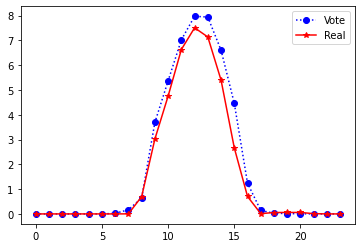

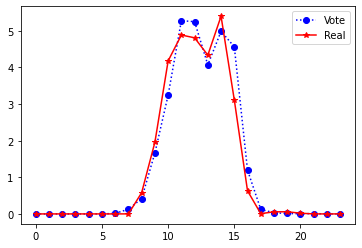

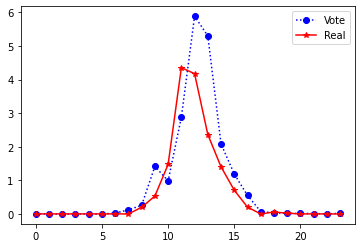

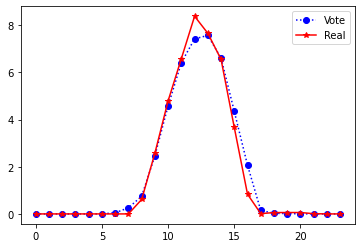

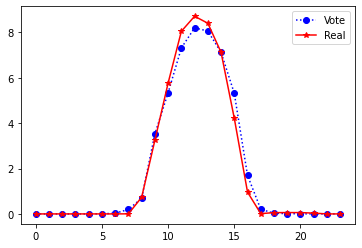

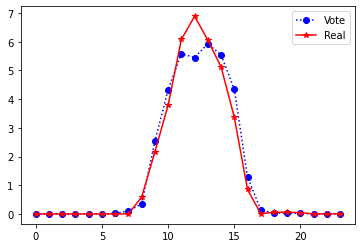

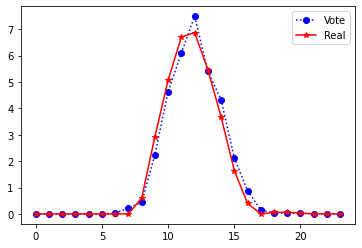

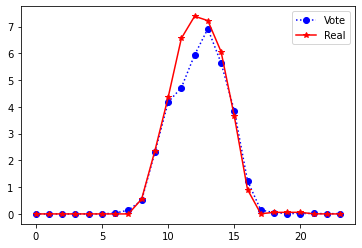

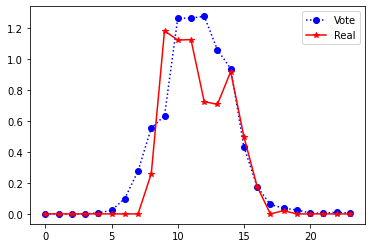

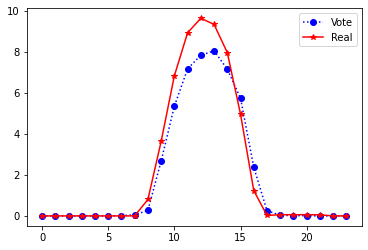

In [18]:
import matplotlib.pyplot as plt

# 17520 부터 2020년 data

for t in range (0,10): # 10개씩 plot figure 보고싶음
  date= t + 20  #-------- 보고싶은 구간 반영하여 0~21 까지 수동으로 더해주기
  Ans_date = 25584+date*24 # --- Answer 범위가 range-24부터 시작하니까 (21888부터 20년 7월) (25560부터 20년 12월)
  
  x=np.array(range(24))
  Y = Pred_Rescale[24*date:24*date+24]
  Answer = pd.Series(data[Ans_date-24:Ans_date]['전력거래량']).array
  #Answer = pd.Series(data[Ans_date-24:Ans_date]['전력거래량']).array
  
  plt.figure()
  plt.plot(x,Y,'bo:')
  plt.plot(x,Answer,'r*-')
  plt.legend(['Vote','Real'])

In [19]:
from sklearn.metrics import mean_absolute_error

voting_mae = mean_absolute_error(LSTM.predict(x_pred), y_pred)
print('LSTM mae :', max_val*voting_mae)

LSTM mae : 0.24935438724731124


In [20]:
LSTM_eval = LSTM.evaluate(x_pred,y_pred)
LSTM_MAE = LSTM_eval[1]*max_val
print('LSTM MAE =',LSTM_MAE)

24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0231
LSTM MAE = 0.24935441172549128


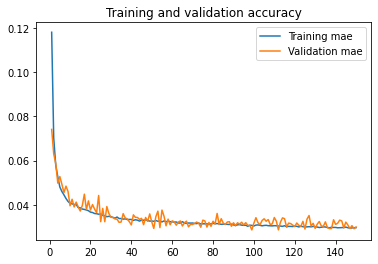

In [21]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(mae) + 1) 

plt.plot(epochs, mae, label = 'Training mae')
plt.plot(epochs, val_mae, label = 'Validation mae')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

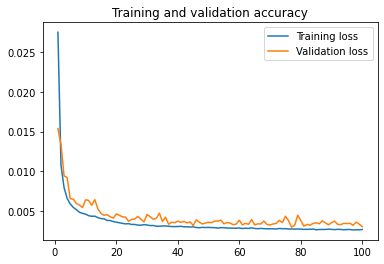

In [ ]:
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()